<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


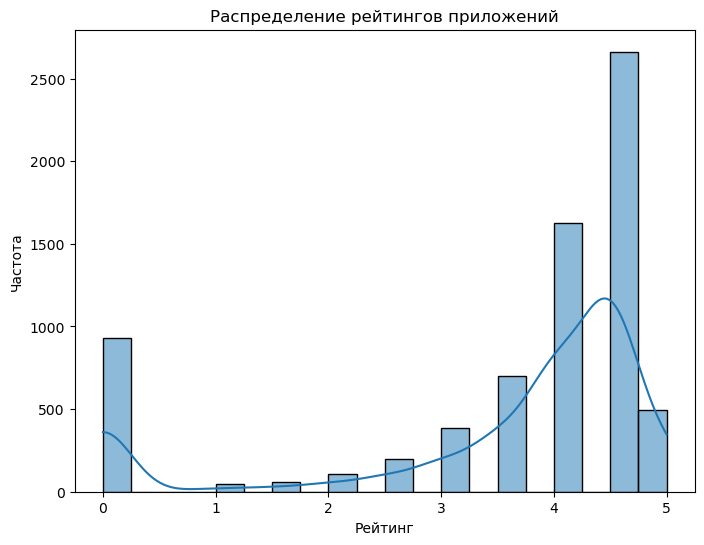

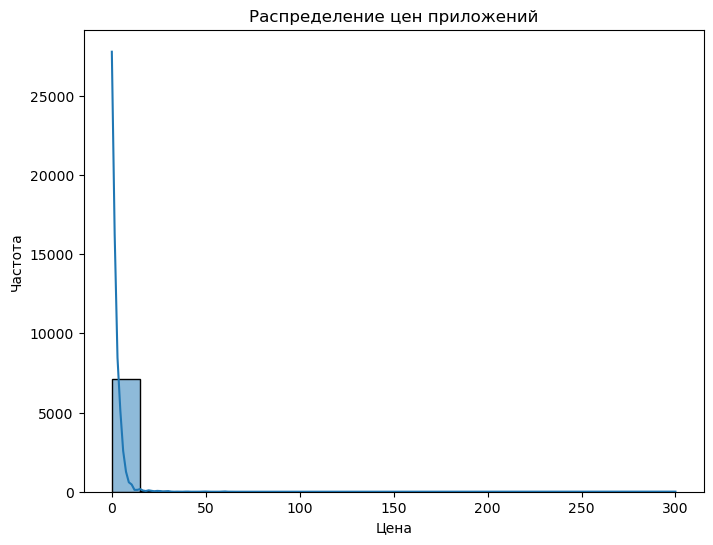

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('AppleStore.csv')

print(df.info())
print(df.describe())

print(df.head())

print(df.isnull().sum())

df = df.dropna(subset=['user_rating', 'price'])

df['price'] = pd.to_numeric(df['price'], errors='coerce')

df['user_rating'] = pd.to_numeric(df['user_rating'], errors='coerce')

plt.figure(figsize=(8, 6))
sns.histplot(df['user_rating'], kde=True, bins=20)
plt.title('Распределение рейтингов приложений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=20)
plt.title('Распределение цен приложений')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

prime_genre
Productivity         4.005618
Music                3.978261
Photo & Video        3.800860
Business             3.745614
Health & Fitness     3.700000
Games                3.685008
Weather              3.597222
Shopping             3.540984
Reference            3.453125
Travel               3.376543
Education            3.376380
Medical              3.369565
Utilities            3.278226
Entertainment        3.246729
Food & Drink         3.182540
Social Networking    2.985030
Sports               2.982456
News                 2.980000
Lifestyle            2.805556
Navigation           2.684783
Book                 2.477679
Finance              2.432692
Catalogs             2.100000
Name: user_rating, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_8892\552565481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_segment.index, y=genre_segment.values, palette='viridis')


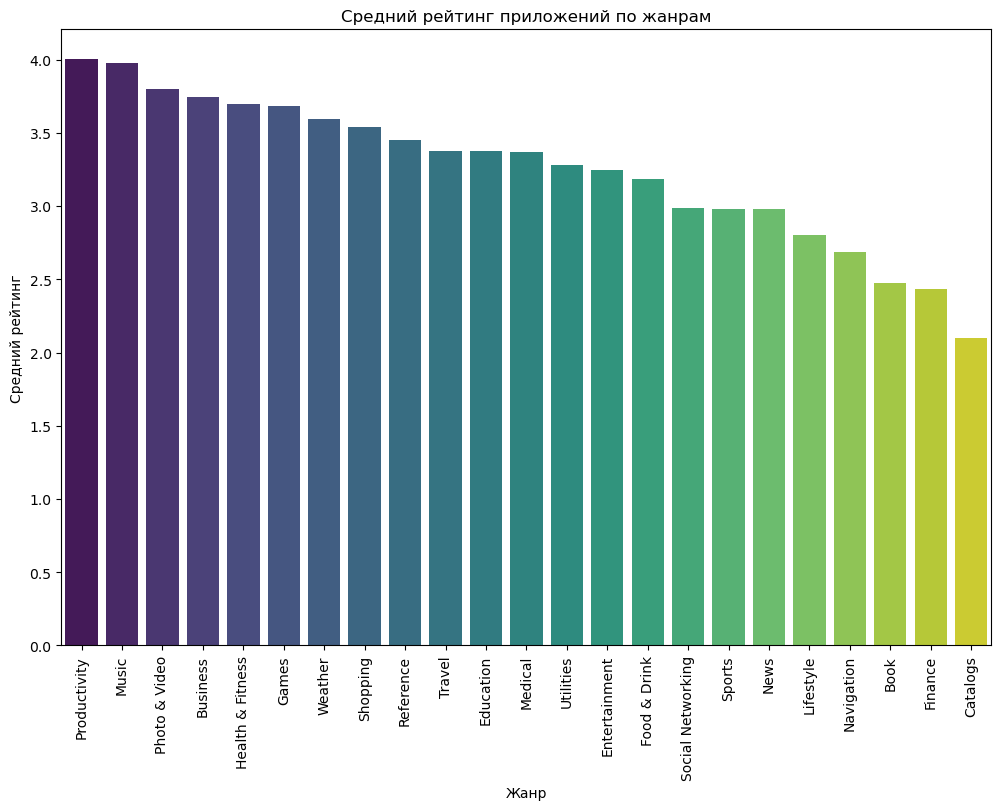

price
18.99     5.000000
29.99     4.583333
99.99     4.500000
34.99     4.500000
21.99     4.500000
59.99     4.333333
19.99     4.307692
49.99     4.250000
39.99     4.250000
27.99     4.250000
13.99     4.250000
8.99      4.166667
15.99     4.125000
6.99      4.009036
17.99     4.000000
249.99    4.000000
299.99    4.000000
16.99     4.000000
2.99      3.891654
4.99      3.836294
3.99      3.796029
1.99      3.737520
9.99      3.629630
74.99     3.500000
7.99      3.469697
0.99      3.464286
5.99      3.423077
0.00      3.376726
24.99     3.312500
14.99     3.000000
23.99     2.500000
20.99     2.250000
11.99     2.166667
22.99     1.750000
12.99     0.900000
47.99     0.000000
Name: user_rating, dtype: float64


In [3]:
genre_segment = df.groupby('prime_genre')['user_rating'].mean().sort_values(ascending=False)
print(genre_segment)

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_segment.index, y=genre_segment.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Средний рейтинг приложений по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг')
plt.show()

price_segment = df.groupby('price')['user_rating'].mean().sort_values(ascending=False)
print(price_segment)

C:\Users\user\AppData\Local\Temp\ipykernel_8892\3116617411.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ltv.index, y=ltv.values, palette='plasma')


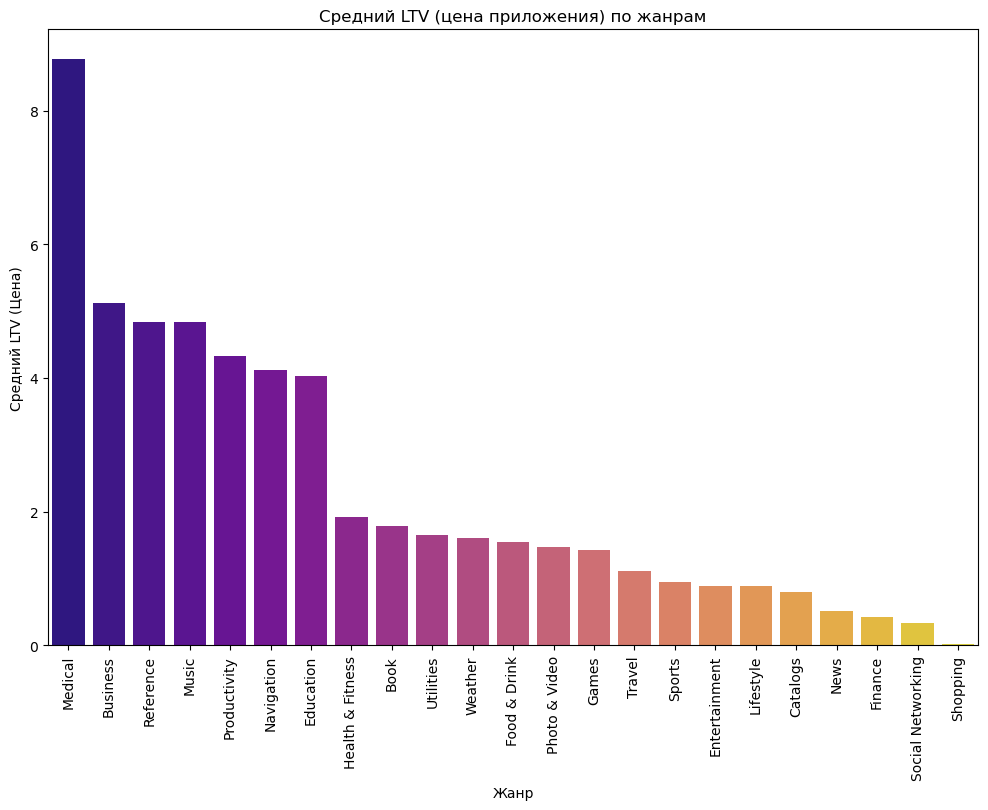

In [5]:
ltv = df.groupby('prime_genre')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=ltv.index, y=ltv.values, palette='plasma')
plt.xticks(rotation=90)
plt.title('Средний LTV (цена приложения) по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Средний LTV (Цена)')
plt.show()

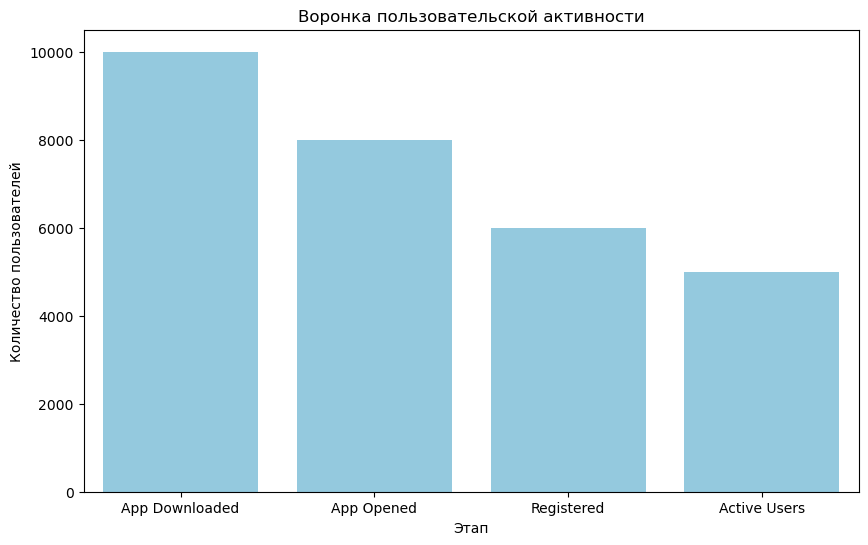

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

stages = ['App Downloaded', 'App Opened', 'Registered', 'Active Users']
users_count = [10000, 8000, 6000, 5000]

plt.figure(figsize=(10, 6))
sns.barplot(x=stages, y=users_count, color='skyblue')
plt.title('Воронка пользовательской активности')
plt.xlabel('Этап')
plt.ylabel('Количество пользователей')
plt.show()


In [11]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')
